### Installing of Requirements (only run this if you haven't installed the necessary libraries found in requirements.txt)

In [1]:
import geopandas as  gpd
import os
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import requests
from io import BytesIO
from PIL import Image

c:\Users\dbyon\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\__init__.py:169: UserWarning: A NumPy version >=1.18.5 and <1.26.0 is required for this version of SciPy (detected version 1.26.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Todo
- convert all geojson files into 1 geodataframe 
- data cleaning
- clip the inputs onto the map layer, similar to getting the intersection between the points and the map layer
- return the output onto a file
- write documentation in this notebook if necessary

### Reading the Paranaque Images and Saving a compiled GEOJSON file of the images 

In [2]:
base_dir = os.getcwd()

In [3]:
# Accessing the data of Paranque images
paranaque_json_dir =  'data/json/paranaque'
os.chdir(paranaque_json_dir)


In [4]:
gdf_list = []
geojson_Count = 0

In [5]:
for file in os.listdir():
    if file.endswith('.geojson'):
        gdf = gpd.read_file(file)
        geojson_Count += 1
        
        # filter out null json files
        if '"features": []' not in gdf:
            gdf = gpd.read_file(file)
            gdf_list.append(gdf)
            

In [6]:
if gdf_list:
    merged_gdf = gpd.GeoDataFrame(pd.concat(gdf_list, ignore_index=True), crs=gdf_list[0].crs)
    
    # Extracting URLs and coordinates from the merged GeoDataFrame
    img_urls = merged_gdf["thumb_2048_url"]
    coordinates = merged_gdf["geometry"]
else:
    print("No GeoJSON files with features found.")

In [7]:
os.chdir(base_dir)

In [8]:
os.getcwd()

'd:\\Users\\dbyon\\Desktop\\street-image-extractor'

# Saving images locally

## Distanced Images

### PARANAQUE

In [9]:
img_dir = "data/images/newParanaque"

In [10]:
merged_gdf = gpd.GeoDataFrame(pd.concat(gdf_list, ignore_index=True), crs=gdf_list[0].crs)

In [11]:
img_urls = merged_gdf["thumb_2048_url"]
img_urls = img_urls.to_numpy()
num_digits = len(str(len(img_urls)))


In [12]:
added_coords = []

In [13]:
# !pip install geopy

In [19]:
from geopy.distance import distance

start_index = 0  # Specify the index from which you want to start

for i, img_url in enumerate(img_urls[start_index:], start=start_index):
    # Format the index with leading zeros to ensure a specific number of digits
    file_number = str(i).zfill(num_digits)
    img_path = f"{img_dir}/paranaque{file_number}.jpg"

    if added_coords:
        far_enough = True
        coord = (coordinates[i].x, coordinates[i].y)
        for added_coord in added_coords:
            dist = distance((added_coord[1],added_coord[0]), (coord[1],coord[0])).kilometers
            if dist <= 0.2:
                far_enough = False
                break
                
        if(far_enough):
            response = requests.get(img_url)
            img = Image.open(BytesIO(response.content))
            img.save(img_path, "JPEG")
            added_coords.append(coord)
    else:
        response = requests.get(img_url)
        img = Image.open(BytesIO(response.content))
        file_number = str(i).zfill(num_digits)
        img.save(f"{img_dir}/paranaque{file_number}.jpg", "JPEG")
        added_coords.append((coordinates[i].x, coordinates[i].y))


ModuleNotFoundError: No module named 'geopy'

In [ ]:
len(added_coords)

572

In [ ]:
import csv

# After processing all images, save the saved coordinates to a CSV file
csv_file_path = "data/csv/newParanaque_saved_coordinates.csv"
with open(csv_file_path, mode='w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(["X", "Y"])  # Header
    for coord in added_coords:
        writer.writerow([coord[0], coord[1]])

print("Saved coordinates are written to:", csv_file_path)

Saved coordinates are written to: data/csv/newParanaque_saved_coordinates.csv


## Saving Majority Images

### Paranaque

In [ ]:
img_dir = "data/images/major_pasig"
merged_gdf = gpd.GeoDataFrame(pd.concat(gdf_list, ignore_index=True), crs=gdf_list[0].crs)

In [ ]:
img_urls = merged_gdf["thumb_2048_url"]
img_urls = img_urls.to_numpy()
num_digits = len(str(len(img_urls)))

In [ ]:
start_index = 4019  # Specify the index from which you want to start

for i, img_url in enumerate(img_urls[start_index:], start=start_index):
    if img_url:
        # Format the index with leading zeros to ensure a specific number of digits
        file_number = str(i).zfill(num_digits)
        response = requests.get(img_url)
        if response.status_code == 200:
            with Image.open(BytesIO(response.content)) as img:
                img.save(os.path.join(img_dir, f"pasig{file_number}.jpg"), "JPEG")
        else:
            print(f"Failed to download image for feature {i} with URL: {img_url}")
    else:
        print(f"No image URL found for feature {i}")

No image URL found for feature 4024
No image URL found for feature 4029
No image URL found for feature 4033
No image URL found for feature 4047
No image URL found for feature 4048
No image URL found for feature 4055
No image URL found for feature 4058
No image URL found for feature 4059
No image URL found for feature 4062
No image URL found for feature 4067
No image URL found for feature 4070
No image URL found for feature 4071
No image URL found for feature 4072
No image URL found for feature 4090
No image URL found for feature 4093
No image URL found for feature 4095
No image URL found for feature 4096
No image URL found for feature 4100
No image URL found for feature 4101
No image URL found for feature 4105
No image URL found for feature 4111
No image URL found for feature 4120
No image URL found for feature 4121
No image URL found for feature 4124
No image URL found for feature 4125
No image URL found for feature 4130
No image URL found for feature 4132
No image URL found for featu

KeyboardInterrupt: 

### PASIG

In [ ]:
base_dir = os.getcwd()

In [ ]:
os.getcwd()

'C:\\Users\\Sean\\Documents\\Python Notebooks\\street-image-extractor'

In [ ]:
# Accessing the data of Paranque images
pasig_json_dir =  'data/json/pasig'
os.chdir(pasig_json_dir)

In [ ]:
gdf_list = []
geojson_Count = 0

In [ ]:
for file in os.listdir():
    if file.endswith('.geojson'):
        gdf = gpd.read_file(file)
        geojson_Count += 1
        
        # filter out null json files
        if '"features": []' not in gdf:
            gdf = gpd.read_file(file)
            gdf_list.append(gdf)
            

In [ ]:
if gdf_list:
    merged_gdf = gpd.GeoDataFrame(pd.concat(gdf_list, ignore_index=True), crs=gdf_list[0].crs)
    
    # Extracting URLs and coordinates from the merged GeoDataFrame
    img_urls = merged_gdf["thumb_2048_url"]
    coordinates = merged_gdf["geometry"]
else:
    print("No GeoJSON files with features found.")

In [ ]:
os.chdir(base_dir)

In [ ]:
os.getcwd()

'C:\\Users\\Sean\\Documents\\Python Notebooks\\street-image-extractor'

In [ ]:
img_dir = "data/images/newPasig"

In [ ]:
merged_gdf = gpd.GeoDataFrame(pd.concat(gdf_list, ignore_index=True), crs=gdf_list[0].crs)

In [ ]:
img_urls = merged_gdf["thumb_2048_url"]
img_urls = img_urls.to_numpy()
num_digits = len(str(len(img_urls)))

In [ ]:
added_coords = []

In [ ]:
import logging

# Configure logging
logging.basicConfig(filename='request_errors.log', level=logging.ERROR)

start_index = 0  # Specify the index from which you want to start

for i, img_url in enumerate(img_urls[start_index:], start=start_index):
    try:
        # Format the index with leading zeros to ensure a specific number of digits
        file_number = str(i).zfill(num_digits)
        img_path = f"{img_dir}/pasig{file_number}.jpg"

        if added_coords:
            far_enough = True
            coord = (coordinates[i].x, coordinates[i].y)
            for added_coord in added_coords:
                dist = distance((added_coord[1],added_coord[0]), (coord[1],coord[0])).kilometers
                if dist <= 0.2:
                    far_enough = False
                    break               
           
            if far_enough:
                response = requests.get(img_url)
                img = Image.open(BytesIO(response.content))
                img.save(img_path, "JPEG")
                added_coords.append(coord)

        else:
            response = requests.get(img_url)
            img = Image.open(BytesIO(response.content))
            file_number = str(i).zfill(num_digits)
            img.save(f"{img_dir}/pasig{file_number}.jpg", "JPEG")
            added_coords.append((coordinates[i].x, coordinates[i].y))
    except Exception as e:
        # Log the error along with the URL
        print(f"Failed to request URL: {img_url}, Error: {str(e)}")
        # Remove coordinate from added_coords if there's an error
        # if added_coords:
        #     added_coords.pop(-1)  # Remove the last added coordinate

# You can further handle the removal of coordinates based on your specific requirements


Failed to request URL: None, Error: Invalid URL 'None': No scheme supplied. Perhaps you meant http://None?
Failed to request URL: None, Error: Invalid URL 'None': No scheme supplied. Perhaps you meant http://None?
Failed to request URL: None, Error: Invalid URL 'None': No scheme supplied. Perhaps you meant http://None?
Failed to request URL: None, Error: Invalid URL 'None': No scheme supplied. Perhaps you meant http://None?
Failed to request URL: None, Error: Invalid URL 'None': No scheme supplied. Perhaps you meant http://None?
Failed to request URL: None, Error: Invalid URL 'None': No scheme supplied. Perhaps you meant http://None?
Failed to request URL: None, Error: Invalid URL 'None': No scheme supplied. Perhaps you meant http://None?
Failed to request URL: None, Error: Invalid URL 'None': No scheme supplied. Perhaps you meant http://None?
Failed to request URL: None, Error: Invalid URL 'None': No scheme supplied. Perhaps you meant http://None?
Failed to request URL: None, Error: I

In [ ]:
len(added_coords)

480

In [ ]:
import csv

# After processing all images, save the saved coordinates to a CSV file
csv_file_path = "data/csv/newPasig_saved_coordinates.csv"
with open(csv_file_path, mode='w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(["X", "Y"])  # Header
    for coord in added_coords:
        writer.writerow([coord[0], coord[1]])

print("Saved coordinates are written to:", csv_file_path)

Saved coordinates are written to: data/csv/newPasig_saved_coordinates.csv


## Saving Majority Images

### Pasig

In [ ]:
img_dir = "data/images/major_pasig"
merged_gdf = gpd.GeoDataFrame(pd.concat(gdf_list, ignore_index=True), crs=gdf_list[0].crs)

In [ ]:
img_urls = merged_gdf["thumb_2048_url"]
img_urls = img_urls.to_numpy()
num_digits = len(str(len(img_urls)))

In [ ]:
start_index = 2543  # Specify the index from which you want to start

for i, img_url in enumerate(img_urls[start_index:], start=start_index):
    if img_url:
        # Format the index with leading zeros to ensure a specific number of digits
        file_number = str(i).zfill(num_digits)
        response = requests.get(img_url)
        if response.status_code == 200:
            with Image.open(BytesIO(response.content)) as img:
                img.save(os.path.join(img_dir, f"paranaque{file_number}.jpg"), "JPEG")
        else:
            print(f"Failed to download image for feature {i} with URL: {img_url}")
    else:
        print(f"No image URL found for feature {i}")

# CREATING THE SIMILARITY MODEL

In [ ]:
# !pip install tensorflow

  Attempting uninstall: google-auth
    Found existing installation: google-auth 1.33.0
    Uninstalling google-auth-1.33.0:
      Successfully uninstalled google-auth-1.33.0
  Attempting uninstall: protobuf
    Found existing installation: protobuf 3.19.1
    Uninstalling protobuf-3.19.1:
      Successfully uninstalled protobuf-3.19.1
  Attempting uninstall: grpcio
    Found existing installation: grpcio 1.42.0
    Uninstalling grpcio-1.42.0:
      Successfully uninstalled grpcio-1.42.0


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-cloud-storage 1.31.0 requires google-auth<2.0dev,>=1.11.0, but you have google-auth 2.27.0 which is incompatible.
google-cloud-core 1.7.1 requires google-auth<2.0dev,>=1.24.0, but you have google-auth 2.27.0 which is incompatible.
google-api-core 1.25.1 requires google-auth<2.0dev,>=1.21.1, but you have google-auth 2.27.0 which is incompatible.


In [ ]:
import requests
from PIL import Image
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy
from io import BytesIO

# Define the model
def build_siamese_network(input_shape):
    left_input = layers.Input(shape=input_shape)
    right_input = layers.Input(shape=input_shape)

    # Shared convolutional layers
    model = models.Sequential()
    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Flatten())
    model.add(layers.Dropout(0.5))  # Add dropout layer for regularization
    model.add(layers.Dense(128, activation='relu'))

    # Encoding for both left and right inputs
    encoded_left = model(left_input)
    encoded_right = model(right_input)

    # L1 distance layer between the two encoded representations
    L1_layer = layers.Lambda(lambda tensors: tf.abs(tensors[0] - tensors[1]))

    # Add the distance layer to the network
    L1_distance = L1_layer([encoded_left, encoded_right])

    # Prediction layer
    prediction = layers.Dense(1, activation='sigmoid')(L1_distance)

    # Create and compile the model
    siamese_model = models.Model(inputs=[left_input, right_input], outputs=prediction)
    siamese_model.compile(loss=BinaryCrossentropy(), optimizer=Adam(), metrics=['accuracy'])

    return siamese_model

def preprocess_image_from_url(image_url, target_size):
    # response = requests.get(image_url)
    img = Image.open(BytesIO(response.content))
    img = img.resize(target_size)
    img_array = np.array(img)
    img_array = tf.expand_dims(img_array, 0)
    img_array = tf.cast(img_array, tf.float32) / 255.0  # Normalize pixel values to be between 0 and 1
    return img_array


# TRAINING THE MODEL

## FOR PARANAQUE IMAGES

In [ ]:
# !pip install opencv-python

In [ ]:
import os

# Folder path
folder_path1 = "data/images/paranaque_X"
folder_path2 = "data/images/pasig_X"

# Get list of files in paranaque
files = os.listdir(folder_path1)

# Initialize an empty list to store integer names
paranaqueList = []

# Iterate through each file name
for file_name in files:
    try:
        # Convert the file name to an integer and append to the list
        paranaqueList.append(int(file_name))
    except ValueError:
        # If conversion fails, print a message and continue to the next file
        print(f"Ignoring non-integer file name: {file_name}")

        
# Get list of files in pasig
files = os.listdir(folder_path2)

# Initialize an empty list to store integer names
pasigList = []

# Iterate through each file name
for file_name in files:
    try:
        # Convert the file name to an integer and append to the list
        pasigList.append(int(file_name))
    except ValueError:
        # If conversion fails, print a message and continue to the next file
        print(f"Ignoring non-integer file name: {file_name}")
        
pasigList = sorted(pasigList)

# Print the list of integer names
print(len(paranaqueList), len(pasigList))


200 200


In [ ]:
input_shape = (128 , 128 , 3)  # Adjust input shape based on your images
target_size = (128 , 128 ) 

In [ ]:
# train test split 70 30
paranaqueTrain, paranaqueTest, pasigTrain, pasigTest = train_test_split(paranaqueList, pasigList, test_size=0.3)
print(len(paranaqueTrain), len(paranaqueTest), len(pasigTrain), len(pasigTest))

140 60 140 60


In [ ]:
paranaqueTrain = sorted(paranaqueTrain)
paranaqueTest = sorted(paranaqueTest)
pasigTrain = sorted(pasigTrain)
pasigTest = sorted(pasigTest)

In [ ]:
trainImages1 = []
trainImages2 = []
y_train = []

In [ ]:
files = os.listdir(folder_path1)

# names = [str(name) for name in paranaqueTrain]

for name in paranaqueTrain:
    folder_path = os.path.join(folder_path1,str(name))

     # Check if the folder exists
    if os.path.exists(folder_path) and os.path.isdir(folder_path):
        # print(f"The folder '{name}' exists.")
        
        # Get the list of files in the folder
        files = os.listdir(folder_path)
        
        # Iterate through the first two files
        for i, file in enumerate(files[:2]):
            # Check if the file is an image (you may need to adjust the condition)
            if file.endswith(".jpg") or file.endswith(".png"):
                # Load the image
                image_path = os.path.join(folder_path, file)
                image = Image.open(image_path)
                
               
                
                # Append the image to the respective list based on index
                if i == 0:
                    trainImages1.append(image)
                elif i == 1:
                    trainImages2.append(image)
                    
        y_train.append(1 if name <= 100 else 0)            
    else:
        print(f"The folder '{name}' does not exist.")

    
files = os.listdir(folder_path2)

# names = [str(name) for name in pasigTrain]
        
for name in pasigTrain:
    folder_path = os.path.join(folder_path2,str(name))

     # Check if the folder exists
    if os.path.exists(folder_path) and os.path.isdir(folder_path):
        # print(f"The folder '{name}' exists.")
        # Get the list of files in the folder
        files = os.listdir(folder_path)
        
        # Iterate through the first two files
        for i, file in enumerate(files[:2]):
            # Check if the file is an image (you may need to adjust the condition)
            if file.endswith(".jpg") or file.endswith(".png"):
                # Load the image
                image_path = os.path.join(folder_path, file)
                image = Image.open(image_path)
                
              
                
                # Append the image to the respective list based on index
                if i == 0:
                    trainImages1.append(image)
                elif i == 1:
                    trainImages2.append(image)
                    
        y_train.append(1 if name <= 100 else 0)
    else:
        print(f"The folder '{name}' does not exist.")
        

In [ ]:
print(len(trainImages1),len(trainImages2), len(y_train))

280 280 280


In [ ]:
testImages1 = []
testImages2 = []
y_test = []

In [ ]:
files = os.listdir(folder_path1)

# names = [str(name) for name in paranaqueTest]


for name in paranaqueTest:
    folder_path = os.path.join(folder_path1,str(name))

     # Check if the folder exists
    if os.path.exists(folder_path) and os.path.isdir(folder_path):
        # print(f"The folder '{name}' exists.")
        
        # Get the list of files in the folder
        files = os.listdir(folder_path)
        
        # Iterate through the first two files
        for i, file in enumerate(files[:2]):
            # Check if the file is an image (you may need to adjust the condition)
            if file.endswith(".jpg") or file.endswith(".png"):
                # Load the image
                image_path = os.path.join(folder_path, file)
                image = Image.open(image_path)
                
                
                
                # Append the image to the respective list based on index
                if i == 0:
                    testImages1.append(image)
                elif i == 1:
                    testImages2.append(image)
                    
        y_test.append(1 if name <= 100 else 0)
    else:
        print(f"The folder '{name}' does not exist.")

    
files = os.listdir(folder_path2)

# names = [str(name) for name in pasigTest]
        
for name in pasigTest:
    folder_path = os.path.join(folder_path2,str(name))

     # Check if the folder exists
    if os.path.exists(folder_path) and os.path.isdir(folder_path):
        # print(f"The folder '{name}' exists.")
        
        # Get the list of files in the folder
        files = os.listdir(folder_path)
        
        # Iterate through the first two files
        for i, file in enumerate(files[:2]):
            # Check if the file is an image (you may need to adjust the condition)
            if file.endswith(".jpg") or file.endswith(".png"):
                # Load the image
                image_path = os.path.join(folder_path, file)
                image = Image.open(image_path)
                
               
                # Append the image to the respective list based on index
                if i == 0:
                    testImages1.append(image)
                elif i == 1:
                    testImages2.append(image)

        y_test.append(1 if name <= 100 else 0)
    else:
        print(f"The folder '{name}' does not exist.")
        

In [ ]:
print(len(testImages1),len(testImages2),len(y_test))

120 120 120


In [ ]:
# Set random seed for NumPy
np.random.seed(42)

# Set random seed for TensorFlow
tf.random.set_seed(42)

# Compile the model
siamese_model = build_siamese_network(input_shape)

# siamese_model = create_siamese_network(input_shape)
siamese_model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

siamese_model.summary()

Model: "model_26"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_53 (InputLayer)       [(None, 128, 128, 3)]        0         []                            
                                                                                                  
 input_54 (InputLayer)       [(None, 128, 128, 3)]        0         []                            
                                                                                                  
 sequential_26 (Sequential)  (None, 128)                  7392320   ['input_53[0][0]',            
                                                                     'input_54[0][0]']            
                                                                                                  
 lambda_26 (Lambda)          (None, 128)                  0         ['sequential_26[0][0]',

In [ ]:
# Define the target size for resizing
target_size = (128, 128)  # specify your desired width and height

# Resize images in trainImages1
trainImages1_resized = [img.resize(target_size) for img in trainImages1]

# Resize images in trainImages2
trainImages2_resized = [img.resize(target_size) for img in trainImages2]

# Convert resized images to numpy arrays
trainImages1_array = np.array([np.array(img) for img in trainImages1_resized])
trainImages2_array = np.array([np.array(img) for img in trainImages2_resized])

# Convert y_train to numpy array
y_train_array = np.array(y_train)

# Ensure the data shapes are compatible with the model
assert trainImages1_array.shape == trainImages2_array.shape, "Image pairs must have the same shape"
assert len(trainImages1_array) == len(y_train_array), "Number of image pairs must match the number of labels"

# Now you can fit the model using the preprocessed data
siamese_model.fit([trainImages1_array, trainImages2_array], y_train_array, epochs=100, batch_size=32)


Epoch 1/100
9/9 [==============================] - 2s 178ms/step - loss: 0.0022 - accuracy: 1.0000
Epoch 2/100
9/9 [==============================] - 2s 175ms/step - loss: 0.0021 - accuracy: 1.0000
Epoch 3/100
9/9 [==============================] - 2s 185ms/step - loss: 0.0022 - accuracy: 1.0000
Epoch 4/100
9/9 [==============================] - 2s 177ms/step - loss: 0.0021 - accuracy: 1.0000
Epoch 5/100
9/9 [==============================] - 2s 186ms/step - loss: 0.0023 - accuracy: 1.0000
Epoch 6/100
9/9 [==============================] - 2s 183ms/step - loss: 0.0019 - accuracy: 1.0000
Epoch 7/100
9/9 [==============================] - 2s 182ms/step - loss: 0.0020 - accuracy: 1.0000
Epoch 8/100
9/9 [==============================] - 2s 175ms/step - loss: 0.0021 - accuracy: 1.0000
Epoch 9/100
9/9 [==============================] - 2s 187ms/step - loss: 0.0019 - accuracy: 1.0000
Epoch 10/100
9/9 [==============================] - 2s 181ms/step - loss: 0.0018 - accuracy: 1.0000
Epoch 11/

# TESTING THE MODEL

In [ ]:
# Define the target size for resizing
target_size = (128, 128)  # specify your desired width and height

# Resize images in trainImages1
testImages1_resized = [img.resize(target_size) for img in testImages1]

# Resize images in trainImages2
testImages2_resized = [img.resize(target_size) for img in testImages2]

# Convert resized images to numpy arrays
testImages1_array = np.array([np.array(img) for img in testImages1_resized])
testImages2_array = np.array([np.array(img) for img in testImages2_resized])

# Convert y_train to numpy array
y_test_array = np.array(y_test)

# Ensure the data shapes are compatible with the model
assert testImages1_array.shape == testImages2_array.shape, "Image pairs must have the same shape"
assert len(testImages1_array) == len(y_test_array), "Number of image pairs must match the number of labels"

# Now you can make predictions using the preprocessed data
predictions = siamese_model.predict([testImages1_array, testImages2_array])

# Check the length of predictions
print(len(predictions))

4/4 [==============================] - 0s 36ms/step
120


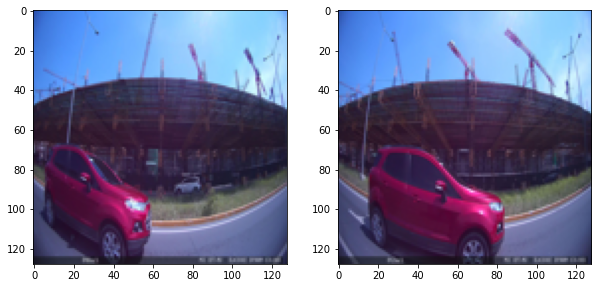

Similarity Score = [0.9999923]
SIMILAR


Press Enter to continue to the next iteration...,   q to exit:  q


In [ ]:
from IPython.display import display, clear_output

for i in range(len(predictions)):
    fig, axes = plt.subplots(1,2, figsize=(10, 5))
    axes[0].imshow(testImages1_array[i])
    axes[1].imshow(testImages2_array[i])
    
    display(fig)
    print("Similarity Score =", predictions[i])
    if(predictions[i] >= 0.20):
        print("SIMILAR")
    else:
        print("DISSIMILAR")
    user_input = input("Press Enter to continue to the next iteration...,   q to exit: ")
    clear_output(wait=True)
    plt.close(fig)
    if user_input.lower() == 'q':
        break

In [ ]:
# Threshold predictions at 0.5 to obtain binary predictions
binary_predictions = np.ravel((predictions > 0.2).astype(int))

# Calculate the number of correct predictions
correct_predictions = np.sum(binary_predictions == y_test_array)

# print(correct_predictions)
# # Calculate the total number of predictions
total_predictions = len(y_test_array)

# # Calculate the accuracy percentage
accuracy_percentage = (correct_predictions / total_predictions) * 100

print("Accuracy: {:.2f}%".format(accuracy_percentage))


Accuracy: 77.50%


## Displaying Other Evaluation Metrics

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)



## Applying Model on Other Images

Sample Code for testing

In [ ]:
import json
import numpy as np

def extract_scores(json_file):
    image_urls = []
    scores_arrays = []
    confidence_scores_arrays = []

    with open(json_file, 'r') as f:
        data = json.load(f)

    for image_data in data:
        image_urls.append(image_data['image_url'])
        
        scores = image_data['scores']
        scores_array = np.array(list(scores.values()))
        scores_arrays.append(scores_array)
        
        confidence_scores = image_data['confidence_scores']
        confidence_scores_array = np.array(list(confidence_scores.values()))
        confidence_scores_arrays.append(confidence_scores_array)

    return image_urls, scores_arrays, confidence_scores_arrays

# Example usage:
json_file = 'image_scores.json'
image_urls, scores_arrays, confidence_scores_arrays = extract_scores(json_file)

# Now you have separate NumPy arrays for scores and confidence scores, along with the image URLs.
# You can access these arrays outside the function as needed.


In [ ]:
import numpy as np

# Example array of scores (assuming each row represents a set of scores for each image)
scores = np.array([
    [[4, 5, 3], [2, 3, 4], [5, 4, 2]],  # Scores for image 1
    [[3, 2, 4], [5, 4, 3], [2, 3, 5]],  # Scores for image 2
    [[5, 4, 3], [3, 2, 4], [4, 3, 5]]   # Scores for image 3
])

# Example array of confidence scores (assuming each row represents a set of confidence scores for each image)
confidence_scores = np.array([
    [[3, 4, 5], [4, 3, 2], [5, 2, 4]],  # Confidence scores for image 1
    [[4, 3, 2], [3, 4, 5], [2, 5, 4]],  # Confidence scores for image 2
    [[5, 2, 4], [2, 5, 4], [4, 3, 2]]   # Confidence scores for image 3
])

# Compute the weighted average for each image
weighted_avg = np.average(scores, weights=confidence_scores, axis=1)

print("Weighted average of each image:")
print(weighted_avg)


Weighted average of each image:
[[3.75       4.11111111 2.81818182]
 [3.44444444 3.08333333 3.90909091]
 [4.27272727 2.7        3.8       ]]


In [ ]:
import numpy as np

# Assuming you have an array of scores and confidence scores
scores = np.array([90, 85, 95, 70, 80, 60, 75, 88, 92, 83])

# Get the indices of the top 5 highest combined scores
top_indices = np.argsort(scores)[-5:]

# Save the indices of the top 5 highest scores
top_5_indices = top_indices[::-1]  # Reverse the array to get descending order

print("Top 5 indices:", top_5_indices)


In [ ]:
# Use the indices to retrieve scores from the other array
top_5_scores_other_array = other_scores[top_5_indices]

print("Top 5 scores from the other array:", top_5_scores_other_array)

In [ ]:
import requests, mercantile
import geojson
import os
from dotenv import load_dotenv

load_dotenv()
metadata_endpoint = "https://graph.mapillary.com"

east, south, west, north = [120.983336, 14.438567, 121.057145, 14.53349]
tiles = list(mercantile.tiles(east, south, west, north, 18))
bbox_list = [mercantile.bounds(tile.x, tile.y, tile.z) for tile in tiles]
client_token = os.getenv("ACCESS_TOKEN")

features = []

path = "data/mapillary/paranaque"
try:
    os.makedirs(path)
    print("Folder %s created!" % path)
except FileExistsError:
    print("Folder %s already exists" % path)

for i, bbox in enumerate(bbox_list):
    bbox_features = []
    bbox_str = str(f'{bbox.west},{bbox.south},{bbox.east},{bbox.north}')
    url = f"https://graph.mapillary.com/images?access_token={client_token}&fields=id,geometry,is_pano,thumb_2048_url&bbox={bbox_str}&is_pano=false"
    response = requests.get(url)
    if response.status_code == 200:
        json = response.json()
  
        # check if the response is empty or not
        if len(json["data"]):
            for obj in json["data"]:
  
                # build a GeoJSON object for each feature
                feature = geojson.Feature(geometry=obj["geometry"], properties={"id": obj["id"], "is_pano": obj["is_pano"], "thumb_2048_url": obj.get("thumb_2048_url", None)})

                bbox_features.append(feature)


        featureCollection = geojson.FeatureCollection(bbox_features)
        dump = geojson.dumps(featureCollection)


        with open(f"{path}/paranaque{i}.geojson", "w") as outfile:
          outfile.write(dump)

Folder data/mapillary/paranaque created!


In [ ]:
print("DONEEE")

DONEEE


## Getting Image from Paranaque Scraping

In [ ]:
base_dir = os.getcwd()

In [ ]:
# Accessing the data of Paranque images
paranaque_csv_dir =  'data/LamudiScraping'
os.chdir(paranaque_csv_dir)

In [ ]:
os.getcwd()

'C:\\Users\\Sean\\Documents\\Python Notebooks\\street-image-extractor'

In [ ]:
import csv

file = "lamudi-metro-manila_paranaque-buy.csv"

# Initialize set to store unique pairs of latitude and longitude values
locations = set()

# Open the CSV file
with open(file, 'r', encoding='utf-8') as file:
    reader = csv.DictReader(file)
    
    # Iterate over each row in the CSV
    for row in reader:
        # Extract longitude and latitude values from the corresponding columns
        longitude_str = row.get('longitude')
        latitude_str = row.get('latitude')
        
        # Convert longitude and latitude to floats, if possible
        try:
            longitude = float(longitude_str)
            latitude = float(latitude_str)
        except ValueError:
            # Skip if conversion fails
            continue
        
        # Add the converted values to the set as a tuple
        locations.add((latitude, longitude))

# Print the unique latitude and longitude pairs
print("Unique Latitude and Longitude Pairs:", locations)


Unique Longitude Values: {'121.0245799', '121.008496', '120.985714', '121.011835', '121.024909', '121.006287', '121.04211', '120.991217', '120.984764', '121.025633', '121.00197', '121.043543', '120.989915', '120.997102', '121.038006'}
Unique Latitude Values: {'14.482705', '14.4521766', '14.499387', '14.493719', '14.509206', '14.529416', '14.501556', '14.469863', '14.468547', '14.467199', '14.496788', '14.516398', '14.491803', '14.5091526', '14.501183', '14.492371'}


In [ ]:
os.chdir(base_dir)

In [ ]:
base_dir = os.getcwd()
# Accessing the data of Paranque images
paranaque_json_dir =  'data/json/paranaque'
os.chdir(paranaque_json_dir)


In [ ]:
gdf_list = []
geojson_Count = 0

for file in os.listdir():
    if file.endswith('.geojson'):
        gdf = gpd.read_file(file)
        geojson_Count += 1
        
        # filter out null json files
        if '"features": []' not in gdf:
            gdf = gpd.read_file(file)
            gdf_list.append(gdf)
            

KeyboardInterrupt: 

In [ ]:
if gdf_list:
    merged_gdf = gpd.GeoDataFrame(pd.concat(gdf_list, ignore_index=True), crs=gdf_list[0].crs)
    
    # Extracting URLs and coordinates from the merged GeoDataFrame
    img_urls = merged_gdf["thumb_2048_url"]
    coordinates = merged_gdf["geometry"]
else:
    print("No GeoJSON files with features found.")

In [ ]:
os.chdir(base_dir)

In [ ]:
os.getcwd()

In [ ]:
merged_gdf = gpd.GeoDataFrame(pd.concat(gdf_list, ignore_index=True), crs=gdf_list[0].crs)

In [ ]:
img_urls = merged_gdf["thumb_2048_url"]
img_urls = img_urls.to_numpy()
num_digits = len(str(len(img_urls)))

In [ ]:
# checks url dupes and if URL is empty

from geopy.distance import distance
import csv
from IPython.display import display, Image
import requests

# Assuming img_urls and coordinates are defined somewhere in your code
start_index = 0  # Specify the index from which you want to start

paranaque_nearest_images_all = []
ctr = 1

for location in locations:
    lat, long = location
    paranaque_nearest_images = []

    # Variables to hold current latitude and longitude
    current_lat = lat
    current_long = long

    for i, img_url in enumerate(img_urls[start_index:], start=start_index):
        coord = (coordinates[i].x, coordinates[i].y)

        # Check if the URL is empty
        if not img_url:
            continue

        # Check if the coordinate is valid
        if None in coord:
            continue

        dist = distance((lat, long), (coord[1], coord[0])).kilometers

        # Check if there are less than 5 images in the list or if the current distance is less than the largest distance in the list
        if len(paranaque_nearest_images) < 5 or dist < paranaque_nearest_images[-1][0]:
            # Check if the URL is valid
            try:
                response = requests.head(img_url)
                if response.status_code != 200:
                    # Skip this URL if it's not valid
                    continue
            except requests.RequestException as e:
                # Skip this URL if there's an exception during the request
                print("Error:", e)
                continue

            # Skip this URL if it's returning a "URL signature mismatch" error
            try:
                response.raise_for_status()
            except requests.exceptions.HTTPError as err:
                if "URL signature mismatch" in str(err):
                    print("URL signature mismatch:", img_url)
                    continue

            # Check if the URL is already in the list of nearest images
            if img_url in [url for (_, _, url) in paranaque_nearest_images]:
                continue

            # Insert the image into the list at the appropriate position based on its distance
            for j, (d, _, _) in enumerate(paranaque_nearest_images):
                if dist < d:
                    paranaque_nearest_images.insert(j, (dist, coord, img_url))
                    break
            else:
                paranaque_nearest_images.append((dist, coord, img_url))

            # Keep only the 5 nearest images
            if len(paranaque_nearest_images) > 5:
                paranaque_nearest_images.pop()


    # Save current latitude and longitude along with nearest images
    paranaque_nearest_images_with_coordinates = {
        'lat': current_lat,
        'long': current_long,
        'images': paranaque_nearest_images
    }
    paranaque_nearest_images_all.append(paranaque_nearest_images_with_coordinates)
    
    print(f"COORDINATE {ctr}")
    for i, (dist, coord, img_url) in enumerate(paranaque_nearest_images, start=1):
        print(f"Image {i}:")
        print(f"  URL: {img_url}")
        print(f"  Coordinates: {coord}")
        print(f"  Distance: {dist} kilometers")
        
    ctr+=1
    # Print current latitude and longitude at the end
    print(f"Current Latitude: {current_lat}, Longitude: {current_long}")
    print("---------------------------------------------------------------------------------------------------")


In [ ]:
print("done")

330283


In [ ]:
base_dir = os.getcwd()

DONE______   :  330282


In [ ]:
os.chdir("data/LamudiScraping")
os.getcwd()

In [ ]:
import pandas as pd

# Assuming df is your DataFrame with latitude and longitude columns
# Replace 'latitude_column' and 'longitude_column' with your actual column names

# Load your data into a DataFrame
df = pd.read_csv("lamudi-metro-manila_paranaque-buy.csv")

# Drop rows with null or missing latitude/longitude values
df.dropna(subset=['latitude', 'longitude'], inplace=True)

# Now df contains only rows with non-null latitude and longitude values


In [ ]:
import csv

# Load existing CSV file and create a new CSV file for writing
existing_csv_file = 'lamudi-metro-manila_paranaque-buy.csv'
new_csv_file = 'paranaque_buy_test.csv'

# Determine the maximum number of images per property
max_images = max(len(item['images']) for item in paranaque_nearest_images_all)

# Generate fieldnames based on the maximum number of images
fieldnames = reader.fieldnames + [f'img_url_{i}' for i in range(1, max_images + 1)] + \
             [f'coordinates_{i}' for i in range(1, max_images + 1)] + \
             [f'distance_{i}' for i in range(1, max_images + 1)]

with open(existing_csv_file, 'r', newline='', encoding='utf-8') as f:
    reader = csv.DictReader(f)
    
    with open(new_csv_file, 'w', newline='', encoding='utf-8') as new_f:
        writer = csv.DictWriter(new_f, fieldnames=fieldnames)
        writer.writeheader()
        
        # Loop through each row in the existing CSV
        for row in reader:
            # Check if latitude and longitude values are not empty
            if row['latitude'] and row['longitude']:
                # Extract latitude and longitude from the row
                lat = float(row['latitude'])
                long = float(row['longitude'])        
            
                # Find matching latitude and longitude in pasig_nearest_images_all
                match_found = False
                for item in paranaque_nearest_images_all:
                    # print("ITEMLAT", item['lat'])
                    # print("ITEMLONG", item['long'])
                    
                    if item['lat'] == lat and item['long'] == long:
                        match_found = True
                        # If a match is found, extract image details
                        images = item['images']
                        for i, (dist, coord, img_url) in enumerate(images, start=1):
                            row[f'img_url_{i}'] = img_url
                            row[f'coordinates_{i}'] = coord
                            row[f'distance_{i}'] = dist
                        
                # Write the updated row to the new CSV file
                if match_found:
                    writer.writerow(row)
                else:
                    print(f"No matching images found for latitude {lat} and longitude {long}.")
            else:
                print("Latitude or longitude value is empty, skipping the row.")

print("CSV file updated successfully!")


In [ ]:
os.chdir(base_dir)

## Getting Image from Pasig Scraping

In [ ]:
base_dir = os.getcwd()

In [ ]:
# Accessing the data of Paranque images
pasig_csv_dir =  'data/LamudiScraping'
os.chdir(pasig_csv_dir)



In [ ]:
import csv

file = "lamudi-metro-manila_pasig-buy.csv"

# Initialize set to store unique pairs of latitude and longitude values
locations = set()

# Open the CSV file
with open(file, 'r', encoding='utf-8') as file:
    reader = csv.DictReader(file)
    
    # Iterate over each row in the CSV
    for row in reader:
        # Extract longitude and latitude values from the corresponding columns
        longitude_str = row.get('longitude')
        latitude_str = row.get('latitude')
        
        # Convert longitude and latitude to floats, if possible
        try:
            longitude = float(longitude_str)
            latitude = float(latitude_str)
        except ValueError:
            # Skip if conversion fails
            continue
        
        # Add the converted values to the set as a tuple
        locations.add((latitude, longitude))

# Print the unique latitude and longitude pairs
print("Unique Latitude and Longitude Pairs:", locations)


Unique Latitude and Longitude Pairs: {(14.548791, 121.086626), (14.582707, 121.061458), (14.575822, 121.064324), (14.567197, 121.092265), (14.590053, 121.081755), (14.571885, 121.077937), (14.569208, 121.060157), (14.613073, 121.087967), (14.583952, 121.101245), (14.588464, 121.089097), (14.565391, 121.06934), (14.583771, 121.059675), (14.552166, 121.075788), (14.571957, 121.058764), (14.590946, 121.075788), (14.604707, 121.092082), (14.601887, 121.093698), (14.582943, 121.072573), (14.586827, 121.068624), (14.549724, 121.0977), (14.576282, 121.085049)}


In [ ]:
os.chdir(base_dir)

In [ ]:
base_dir = os.getcwd()
# Accessing the data of Paranque images
pasig_json_dir =  'data/json/pasig'
os.chdir(pasig_json_dir)


In [ ]:
gdf_list = []
geojson_Count = 0

for file in os.listdir():
    if file.endswith('.geojson'):
        gdf = gpd.read_file(file)
        geojson_Count += 1
        
        # filter out null json files
        if '"features": []' not in gdf:
            gdf = gpd.read_file(file)
            gdf_list.append(gdf)
            

In [ ]:
if gdf_list:
    merged_gdf = gpd.GeoDataFrame(pd.concat(gdf_list, ignore_index=True), crs=gdf_list[0].crs)
    
    # Extracting URLs and coordinates from the merged GeoDataFrame
    img_urls = merged_gdf["thumb_2048_url"]
    coordinates = merged_gdf["geometry"]
else:
    print("No GeoJSON files with features found.")

In [ ]:
os.chdir(base_dir)

In [ ]:
merged_gdf = gpd.GeoDataFrame(pd.concat(gdf_list, ignore_index=True), crs=gdf_list[0].crs)

In [ ]:
img_urls = merged_gdf["thumb_2048_url"]
img_urls = img_urls.to_numpy()
num_digits = len(str(len(img_urls)))

In [ ]:
# from geopy.distance import distance
# import csv
# from IPython.display import display, Image
# import requests

# # Assuming img_urls and coordinates are defined somewhere in your code
# start_index = 0  # Specify the index from which you want to start

# pasig_nearest_images_all = []
# ctr = 1

# for location in locations:
#     lat, long = location
#     pasig_nearest_images = []

#     # Variables to hold current latitude and longitude
#     current_lat = lat
#     current_long = long

#     for i, img_url in enumerate(img_urls[start_index:], start=start_index):
#         coord = (coordinates[i].x, coordinates[i].y)

#         # Check if the coordinate is valid
#         if None in coord:
#             continue

#         dist = distance((lat, long), (coord[1], coord[0])).kilometers

#         # Check if there are less than 5 images in the list or if the current distance is less than the largest distance in the list
#         if len(pasig_nearest_images) < 5 or dist < pasig_nearest_images[-1][0]:
#             # Check if the URL is valid
#             try:
#                 response = requests.head(img_url)
#                 if response.status_code != 200:
#                     # Skip this URL if it's not valid
#                     continue
#             except requests.RequestException as e:
#                 # Skip this URL if there's an exception during the request
#                 print("Error:", e)
#                 continue

#             # Skip this URL if it's returning a "URL signature mismatch" error
#             try:
#                 response.raise_for_status()
#             except requests.exceptions.HTTPError as err:
#                 if "URL signature mismatch" in str(err):
#                     print("URL signature mismatch:", img_url)
#                     continue

#             # Insert the image into the list at the appropriate position based on its distance
#             for j, (d, _, _) in enumerate(pasig_nearest_images):
#                 if dist < d:
#                     pasig_nearest_images.insert(j, (dist, coord, img_url))
#                     break
#             else:
#                 pasig_nearest_images.append((dist, coord, img_url))

#             # Keep only the 5 nearest images
#             if len(pasig_nearest_images) > 5:
#                 pasig_nearest_images.pop()


#     # Save current latitude and longitude along with nearest images
#     pasig_nearest_images_with_coordinates = {
#         'lat': current_lat,
#         'long': current_long,
#         'images': pasig_nearest_images
#     }
#     pasig_nearest_images_all.append(pasig_nearest_images_with_coordinates)
    
#     print(f"COORDINATE {ctr}")
#     for i, (dist, coord, img_url) in enumerate(pasig_nearest_images, start=1):
#         print(f"Image {i}:")
#         print(f"  URL: {img_url}")
#         print(f"  Coordinates: {coord}")
#         print(f"  Distance: {dist} kilometers")
        
#     ctr+=1
#     # Print current latitude and longitude at the end
#     print(f"Current Latitude: {current_lat}, Longitude: {current_long}")
#     print("---------------------------------------------------------------------------------------------------")

Error: Invalid URL 'None': No scheme supplied. Perhaps you meant http://None?
Error: Invalid URL 'None': No scheme supplied. Perhaps you meant http://None?
Error: Invalid URL 'None': No scheme supplied. Perhaps you meant http://None?
Error: Invalid URL 'None': No scheme supplied. Perhaps you meant http://None?
Error: Invalid URL 'None': No scheme supplied. Perhaps you meant http://None?
Error: Invalid URL 'None': No scheme supplied. Perhaps you meant http://None?
Error: Invalid URL 'None': No scheme supplied. Perhaps you meant http://None?
Error: Invalid URL 'None': No scheme supplied. Perhaps you meant http://None?
Error: Invalid URL 'None': No scheme supplied. Perhaps you meant http://None?
Error: Invalid URL 'None': No scheme supplied. Perhaps you meant http://None?
Error: Invalid URL 'None': No scheme supplied. Perhaps you meant http://None?
Error: Invalid URL 'None': No scheme supplied. Perhaps you meant http://None?
Error: Invalid URL 'None': No scheme supplied. Perhaps you meant

In [ ]:
# checks url dupes and if URL is empty

from geopy.distance import distance
import csv
from IPython.display import display, Image
import requests

# Assuming img_urls and coordinates are defined somewhere in your code
start_index = 0  # Specify the index from which you want to start

pasig_nearest_images_all = []
ctr = 1

for location in locations:
    lat, long = location
    pasig_nearest_images = []

    # Variables to hold current latitude and longitude
    current_lat = lat
    current_long = long

    for i, img_url in enumerate(img_urls[start_index:], start=start_index):
        coord = (coordinates[i].x, coordinates[i].y)

        # Check if the URL is empty
        if not img_url:
            continue

        # Check if the coordinate is valid
        if None in coord:
            continue

        dist = distance((lat, long), (coord[1], coord[0])).kilometers

        # Check if there are less than 5 images in the list or if the current distance is less than the largest distance in the list
        if len(pasig_nearest_images) < 5 or dist < pasig_nearest_images[-1][0]:
            # Check if the URL is valid
            try:
                response = requests.head(img_url)
                if response.status_code != 200:
                    # Skip this URL if it's not valid
                    continue
            except requests.RequestException as e:
                # Skip this URL if there's an exception during the request
                print("Error:", e)
                continue

            # Skip this URL if it's returning a "URL signature mismatch" error
            try:
                response.raise_for_status()
            except requests.exceptions.HTTPError as err:
                if "URL signature mismatch" in str(err):
                    print("URL signature mismatch:", img_url)
                    continue

            # Check if the URL is already in the list of nearest images
            if img_url in [url for (_, _, url) in pasig_nearest_images]:
                continue

            # Insert the image into the list at the appropriate position based on its distance
            for j, (d, _, _) in enumerate(pasig_nearest_images):
                if dist < d:
                    pasig_nearest_images.insert(j, (dist, coord, img_url))
                    break
            else:
                pasig_nearest_images.append((dist, coord, img_url))

            # Keep only the 5 nearest images
            if len(pasig_nearest_images) > 5:
                pasig_nearest_images.pop()


    # Save current latitude and longitude along with nearest images
    pasig_nearest_images_with_coordinates = {
        'lat': current_lat,
        'long': current_long,
        'images': pasig_nearest_images
    }
    pasig_nearest_images_all.append(pasig_nearest_images_with_coordinates)
    
    print(f"COORDINATE {ctr}")
    for i, (dist, coord, img_url) in enumerate(pasig_nearest_images, start=1):
        print(f"Image {i}:")
        print(f"  URL: {img_url}")
        print(f"  Coordinates: {coord}")
        print(f"  Distance: {dist} kilometers")
        
    ctr+=1
    # Print current latitude and longitude at the end
    print(f"Current Latitude: {current_lat}, Longitude: {current_long}")
    print("---------------------------------------------------------------------------------------------------")


COORDINATE 1
Image 1:
  URL: https://scontent.fmnl17-4.fna.fbcdn.net/m1/v/t6/An_9R7zKGLbncpvSWUDZ0ADvHPdGL6zBO4FDiAnPmlJ5ndTYFnpoq4LMjQq3PK0Qb4hhvDsBmV7EZ9QwMuBravzdkO6KvVM7Sbhe1JVQ0jVULIB6kLDZ7UL9M1rPrLdi3RVDNVGfFJU3wD1Es6cLWw?stp=s2048x1152&ccb=10-5&oh=00_AfCwXp4po40P-cDXAzBIetEj2XBLZi1B8EaqEVv8STcpcA&oe=660D3685&_nc_sid=201bca
  Coordinates: (121.086634, 14.548788)
  Distance: 0.0009238704743145229 kilometers
Image 2:
  URL: https://scontent.fmnl17-4.fna.fbcdn.net/m1/v/t6/An858rxOBdzwwguHo0HiVyfKa-6BOpNryMtUI1JqMlXmyx5XKcc4CwL10A2wL56279BgpmSRwwU1B2wgWxN3YenV-NmeQFHPPX1T7LRMyHuUnFgXbuNvEaY9LqliwFZ3xg1ZQN6dPVAPUFDj0m4ESw?stp=s2048x1152&ccb=10-5&oh=00_AfCmkBK9IHIUP5zkRSUaS2mJkfXlqKhsJEYR5dLuXQELKA&oe=660CFFA4&_nc_sid=201bca
  Coordinates: (121.086621, 14.548798)
  Distance: 0.0009435256154647668 kilometers
Image 3:
  URL: https://scontent.fmnl17-4.fna.fbcdn.net/m1/v/t6/An84zlUHklA06x5JsOa3isCkUH-CdvgdhxT6W86QfQucpgrbxCgC8S9RuGnjkRPzwgaf5vJaDZvDw_gDKf4Adj3p_T2uLcCvCXYVt7kaYu3Rl-GFc7eDH

In [ ]:
print("done")

done


In [ ]:
# Assuming pasig_nearest_images_all is defined somewhere in your code
for item in pasig_nearest_images_all:
    print(f"Latitude: {item['lat']}, Longitude: {item['long']}")
    print("Nearest Images:")
    for i, (dist, coord, img_url) in enumerate(item['images'], start=1):
        print(f"  Image {i}:")
        print(f"    URL: {img_url}")
        print(f"    Coordinates: {coord}")
        print(f"    Distance: {dist} kilometers")
    print("---------------------------------------------------------------------------------------------------\n")


Latitude: 14.586827, Longitude: 121.077937
Nearest Images:
  Image 1:
    URL: https://scontent.fmnl17-4.fna.fbcdn.net/m1/v/t6/An8dpzHVC5a3qADKqENbGzo6TZm65TzXKdElc1_zhNBv18Fs2Gea99IhH3-zOgihapjgbr7dR4y-RVA9pceyH2LHCMuUnTvD2d8oceCHySYi0HVmkrAwjruXWALHzTDEIwYELdpz4QUl6V9-BdxRaw?stp=s2048x1152&ccb=10-5&oh=00_AfARC6q6HePQk_QR73N9lk-XHUHmv6fFGJJj_Or8LlOAOQ&oe=660D0779&_nc_sid=201bca
    Coordinates: (121.077872, 14.586822)
    Distance: 0.007025838986988401 kilometers
  Image 2:
    URL: https://scontent.fmnl17-4.fna.fbcdn.net/m1/v/t6/An_a7fcLyRwjfLYGlirJOeLYBhEzjq50O-EUdZqvX-n9IhB9eiqNvahc4MOjcFAmFiKNPufrPr6Fg0zRxNHYi1Yd536FUGAiaCKzGfTkdbMDlHgn7rbmJq_wc12vpHBZMxljuoV5vstJ7Fo18xjWmA?stp=s2048x1536&ccb=10-5&oh=00_AfAgSJJ80e2UMvRn9hmSQlJRpeRYvFFb7prA-jaNcoIFYg&oe=660D0757&_nc_sid=201bca
    Coordinates: (121.077991, 14.587032)
    Distance: 0.02341662808569924 kilometers
  Image 3:
    URL: https://scontent.fmnl17-4.fna.fbcdn.net/m1/v/t6/An-9oY10hiTVTH2o1kOEKdlLs1m0zwBfnRmW9-F2jw_qy8O8axBUwK

In [ ]:
# from IPython.display import Image

# # Replace 'url_of_your_image' with the actual URL of the image you want to display
# Image(url='https://scontent.fmnl17-4.fna.fbcdn.net/m1/v/t6/An8dpzHVC5a3qADKqENbGzo6TZm65TzXKdElc1_zhNBv18Fs2Gea99IhH3-zOgihapjgbr7dR4y-RVA9pceyH2LHCMuUnTvD2d8oceCHySYi0HVmkrAwjruXWALHzTDEIwYELdpz4QUl6V9-BdxRaw?stp=s2048x1152&ccb=10-5&oh=00_AfARC6q6HePQk_QR73N9lk-XHUHmv6fFGJJj_Or8LlOAOQ&oe=660D0779&_nc_sid=201bca')

In [ ]:
base_dir = os.getcwd()

In [ ]:
os.chdir("data/LamudiScraping")
os.getcwd()

'C:\\Users\\Sean\\Documents\\Python Notebooks\\street-image-extractor\\data\\LamudiScraping'

In [ ]:
import pandas as pd

# Assuming df is your DataFrame with latitude and longitude columns
# Replace 'latitude_column' and 'longitude_column' with your actual column names

# Load your data into a DataFrame
df = pd.read_csv("lamudi-metro-manila_pasig-buy.csv")

# Drop rows with null or missing latitude/longitude values
df.dropna(subset=['latitude', 'longitude'], inplace=True)

# Now df contains only rows with non-null latitude and longitude values


In [ ]:
import csv

# Load existing CSV file and create a new CSV file for writing
existing_csv_file = 'lamudi-metro-manila_pasig-buy.csv'
new_csv_file = 'pasig_buy_test.csv'

# Determine the maximum number of images per property
max_images = max(len(item['images']) for item in pasig_nearest_images_all)

# Generate fieldnames based on the maximum number of images
fieldnames = reader.fieldnames + [f'img_url_{i}' for i in range(1, max_images + 1)] + \
             [f'coordinates_{i}' for i in range(1, max_images + 1)] + \
             [f'distance_{i}' for i in range(1, max_images + 1)]

with open(existing_csv_file, 'r', newline='', encoding='utf-8') as f:
    reader = csv.DictReader(f)
    
    with open(new_csv_file, 'w', newline='', encoding='utf-8') as new_f:
        writer = csv.DictWriter(new_f, fieldnames=fieldnames)
        writer.writeheader()
        
        # Loop through each row in the existing CSV
        for row in reader:
            # Check if latitude and longitude values are not empty
            if row['latitude'] and row['longitude']:
                # Extract latitude and longitude from the row
                lat = float(row['latitude'])
                long = float(row['longitude'])        
            
                # Find matching latitude and longitude in pasig_nearest_images_all
                match_found = False
                for item in pasig_nearest_images_all:
                    print("ITEMLAT", item['lat'])
                    print("ITEMLONG", item['long'])
                    
                    if item['lat'] == lat and item['long'] == long:
                        match_found = True
                        # If a match is found, extract image details
                        images = item['images']
                        for i, (dist, coord, img_url) in enumerate(images, start=1):
                            row[f'img_url_{i}'] = img_url
                            row[f'coordinates_{i}'] = coord
                            row[f'distance_{i}'] = dist
                        
                # Write the updated row to the new CSV file
                if match_found:
                    writer.writerow(row)
                else:
                    print(f"No matching images found for latitude {lat} and longitude {long}.")
            else:
                print("Latitude or longitude value is empty, skipping the row.")

print("CSV file updated successfully!")


LAT 14.582707
LONG 121.061458
ITEMLAT 14.548791
ITEMLONG 121.086626
ITEMLAT 14.582707
ITEMLONG 121.061458
ITEMLAT 14.575822
ITEMLONG 121.064324
ITEMLAT 14.567197
ITEMLONG 121.092265
ITEMLAT 14.590053
ITEMLONG 121.081755
ITEMLAT 14.571885
ITEMLONG 121.077937
ITEMLAT 14.569208
ITEMLONG 121.060157
ITEMLAT 14.613073
ITEMLONG 121.087967
ITEMLAT 14.583952
ITEMLONG 121.101245
ITEMLAT 14.588464
ITEMLONG 121.089097
ITEMLAT 14.565391
ITEMLONG 121.06934
ITEMLAT 14.583771
ITEMLONG 121.059675
ITEMLAT 14.552166
ITEMLONG 121.075788
ITEMLAT 14.571957
ITEMLONG 121.058764
ITEMLAT 14.590946
ITEMLONG 121.075788
ITEMLAT 14.604707
ITEMLONG 121.092082
ITEMLAT 14.601887
ITEMLONG 121.093698
ITEMLAT 14.582943
ITEMLONG 121.072573
ITEMLAT 14.586827
ITEMLONG 121.068624
ITEMLAT 14.549724
ITEMLONG 121.0977
ITEMLAT 14.576282
ITEMLONG 121.085049
LAT 14.582943
LONG 121.072573
ITEMLAT 14.548791
ITEMLONG 121.086626
ITEMLAT 14.582707
ITEMLONG 121.061458
ITEMLAT 14.575822
ITEMLONG 121.064324
ITEMLAT 14.567197
ITEMLONG 121.

In [ ]:
os.chdir(base_dir)

## Predicting image safety scores